<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/Earthquack_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from zlib import crc32
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
path="/content/sample_data/earthquake_1995-2023.csv"

In [3]:
E_data=pd.read_csv(path)

In [4]:
E_data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [5]:
E_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>],
       [<Axes: title={'center': 'tsunami'}>,
        <Axes: title={'center': 'sig'}>, <Axes: title={'center': 'nst'}>],
       [<Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

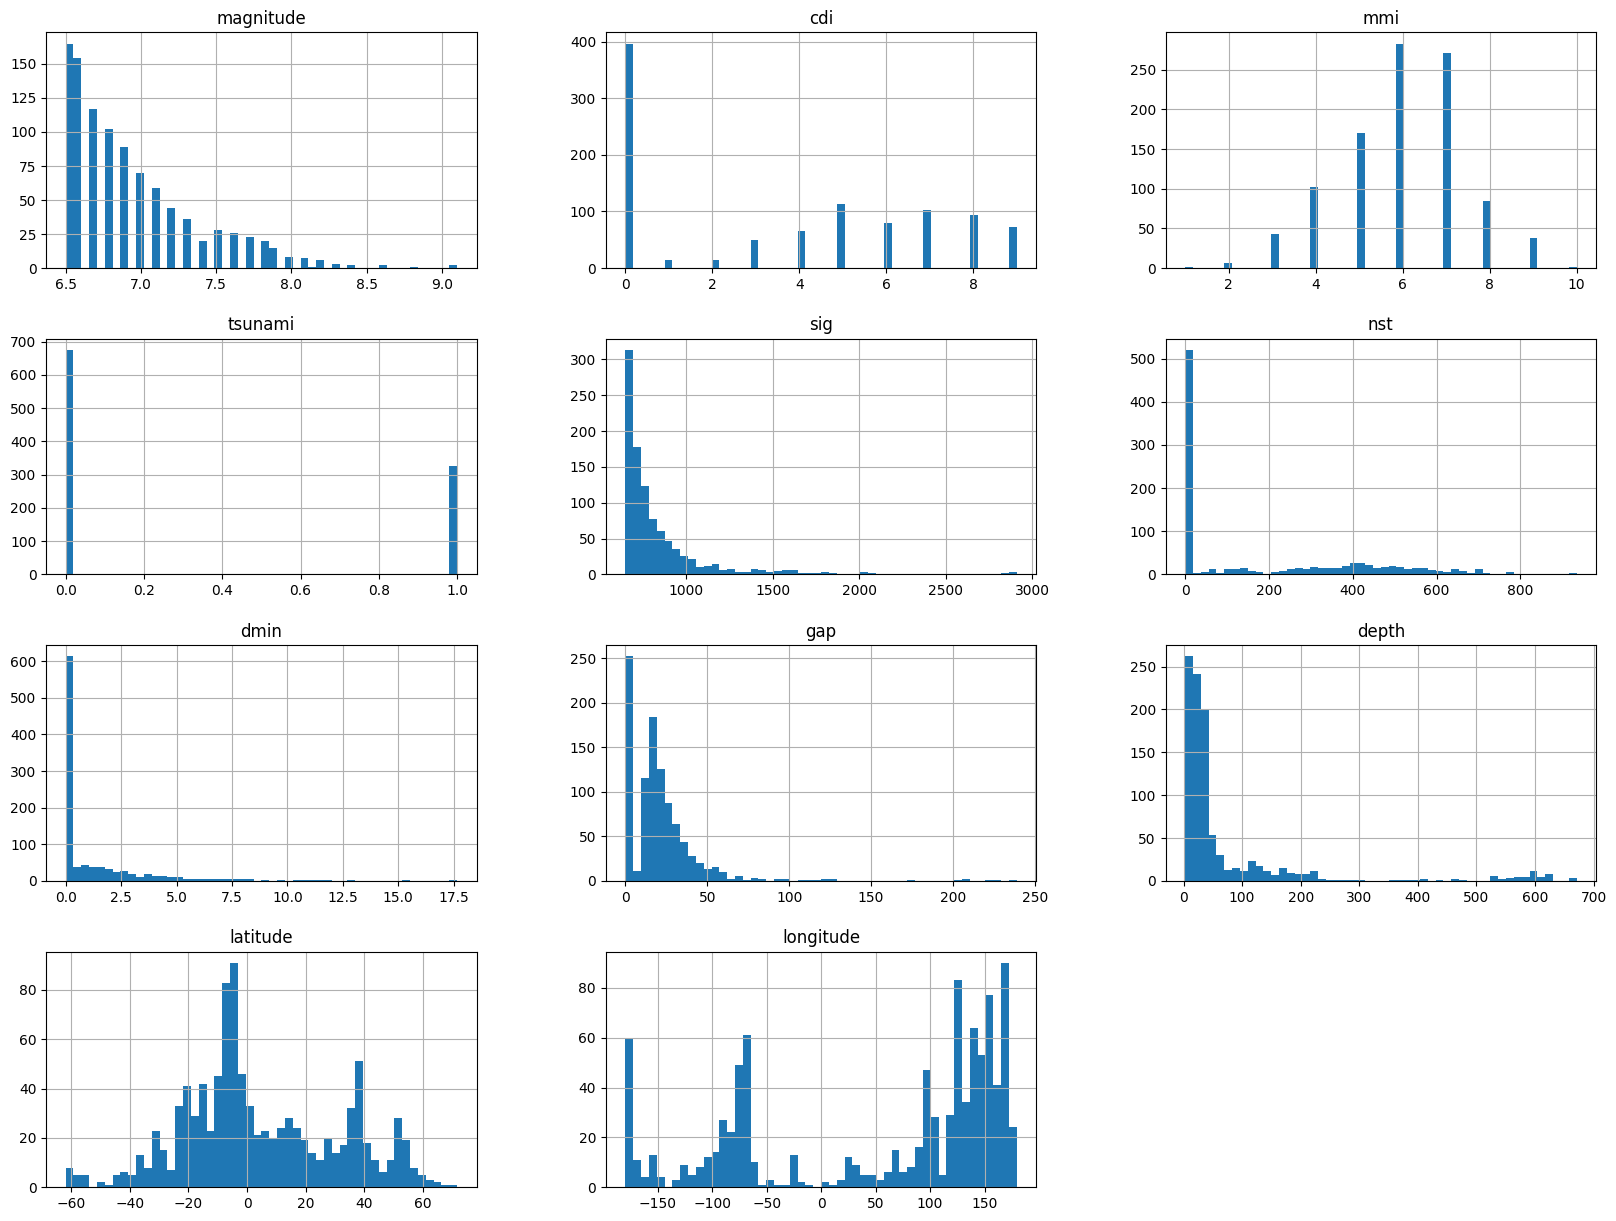

In [6]:
E_data.hist(bins=50,figsize=(20,15))

In [7]:
E_data["id"]=E_data['latitude']*1000+E_data['longitude']


In [8]:
def is_id_in_test(identifier,test_ratio):
  return crc32(np.int64(identifier))<test_ratio*2**32

In [9]:
def split_train_test(data,test_ratio,id_column):
  ids=data[id_column]
  in_test=ids.apply(lambda id_:is_id_in_test(id_,test_ratio))
  test_set=data.loc[in_test]
  train_set=data.loc[~in_test]
  return train_set,test_set

In [10]:
training_set,test_set=split_train_test(E_data,0.2,"id")

In [11]:
bins = [6.5, 6.8, 7.0, 7.2, 7.4, 7.6, 8.0, 8.5, 9.5]
labels = [1, 2, 3, 4, 5, 6, 7, 8]


In [12]:
E_data["mag_cat"]=pd.cut(E_data["magnitude"],bins=bins,labels=labels,include_lowest=True)


In [16]:
bins_mmi = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels_mmi = [1, 2, 3, 4, 5, 6, 7, 8, 9]


- havent include value at lowest .

In [17]:
E_data['mmi_cat']=pd.cut(E_data['mmi'],bins=bins_mmi,labels=labels_mmi,include_lowest=True)

<Axes: xlabel='mmi_cat'>

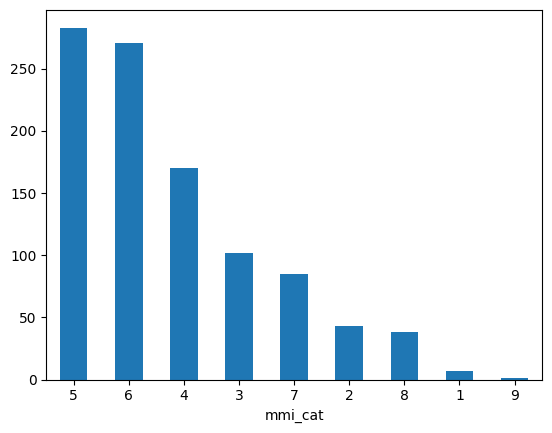

In [18]:
E_data["mmi_cat"].value_counts().sort_values(ascending=False).plot(kind="bar",rot=0)

<Axes: xlabel='mag_cat'>

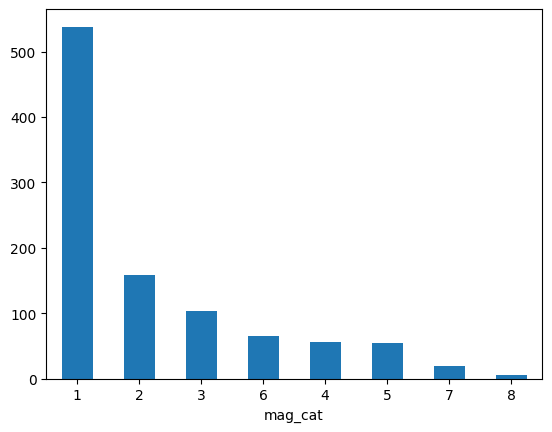

In [13]:
E_data["mag_cat"].value_counts().sort_values(ascending=False).plot(kind="bar",rot=0)

In [19]:

E_data["strat_cat"] = E_data["mag_cat"].astype(str) + "_" + E_data["mmi_cat"].astype(str)


In [35]:
E_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   title      1000 non-null   object  
 1   magnitude  1000 non-null   float64 
 2   date_time  1000 non-null   object  
 3   cdi        1000 non-null   int64   
 4   mmi        1000 non-null   int64   
 5   alert      449 non-null    object  
 6   tsunami    1000 non-null   int64   
 7   sig        1000 non-null   int64   
 8   net        1000 non-null   object  
 9   nst        1000 non-null   int64   
 10  dmin       1000 non-null   float64 
 11  gap        1000 non-null   float64 
 12  magType    1000 non-null   object  
 13  depth      1000 non-null   float64 
 14  latitude   1000 non-null   float64 
 15  longitude  1000 non-null   float64 
 16  location   994 non-null    object  
 17  continent  284 non-null    object  
 18  country    651 non-null    object  
 19  id         1000 non-null   f

In [46]:

cat_counts = E_data['strat_cat'].value_counts()

valid_cats = cat_counts[cat_counts >= 2].index

E_data["filtered_strat_cat"] = E_data["strat_cat"].where(E_data["strat_cat"].isin(valid_cats))


E_data = E_data.dropna(subset=["filtered_strat_cat"])




In [53]:


stratisfier = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_set = []

for train_index, test_index in stratisfier.split(E_data,E_data['filtered_strat_cat'] ):
    Strat_train_set = E_data.iloc[train_index].drop(columns=['filtered_strat_cat', 'mag_cat', 'mmi_cat','strat_cat'])
    Strat_test_set = E_data.iloc[test_index].drop(columns=['filtered_strat_cat', 'mag_cat', 'mmi_cat','strat_cat'])
    strat_set.append((Strat_train_set, Strat_test_set))



In [54]:
train_strat_set,test_strat_set=strat_set[0]

In [55]:
train_strat_set.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,id
910,"M 7.1 - 36 km SW of Monte Patria, Chile",7.1,15-10-1997 01:03,0,7,NaN,0,776,us,0,0.000,0.0,mwc,58.0,-30.9330,-71.220,"Monte Patria, Chile",South America,Chile,-31004.220
244,"M 6.9 - 31 km SW of Burias, Philippines",6.9,28-04-2017 20:23,9,6,green,1,814,us,0,1.636,14.0,mww,26.0,5.5043,125.066,"Burias, Philippines",NaN,Philippines,5629.366
182,"M 7.1 - 1 km SE of Point MacKenzie, Alaska",7.1,30-11-2018 17:29,8,8,orange,1,1790,ak,0,0.000,0.0,mw,46.7,61.3464,-149.955,"Point MacKenzie, Alaska",North America,United States of America,61196.445
422,"M 6.5 - 44 km W of Masachapa, Nicaragua",6.5,15-06-2013 17:34,5,6,green,1,679,us,698,0.000,27.0,mww,30.0,11.7630,-86.926,"Masachapa, Nicaragua",NaN,NaN,11676.074
401,"M 7.1 - off the east coast of Honshu, Japan",7.1,25-10-2013 17:10,6,4,green,1,872,us,0,3.968,10.0,mww,35.0,37.1557,144.661,"off the east coast of Honshu, Japan",NaN,NaN,37300.361
